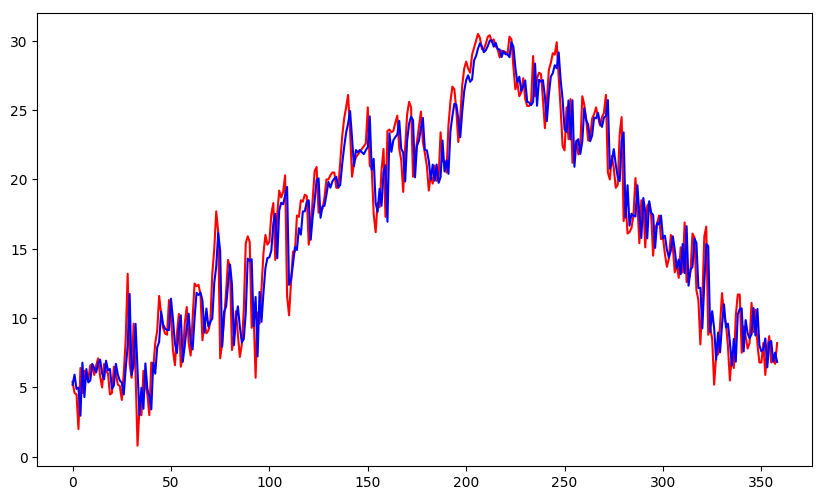

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 気温データ10年分の読み込み
df = pd.read_csv('kion15y.csv', encoding="utf-8")

# データを学習用とテスト用に分割する ---(*1)
train_year = (df["年"] <= 2018)
test_year = (df["年"] == 2019)
interval = 6


# 過去6日分を学習するデータを作成 ---(*2)
def make_data(data):
    x = []  # 学習データ
    y = []  # 結果
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i < interval:
            continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)


train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 直線回帰分析を行う ---(*3)
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y)  # 学習
pre_y = lr.predict(test_x)  # 予測

# 結果を図にプロット ---(*4)
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
# plt.savefig('tenki-kion-lr.png')
plt.show()
